In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 


In [3]:
df =pd.read_csv(r"C:\Users\ameet\OneDrive\Documents\PROJECTS\AIML\insurance.csv")

In [3]:
df.head

<bound method NDFrame.head of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [ ]:
df.shape


(1338, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df.dropna()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [10]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [11]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


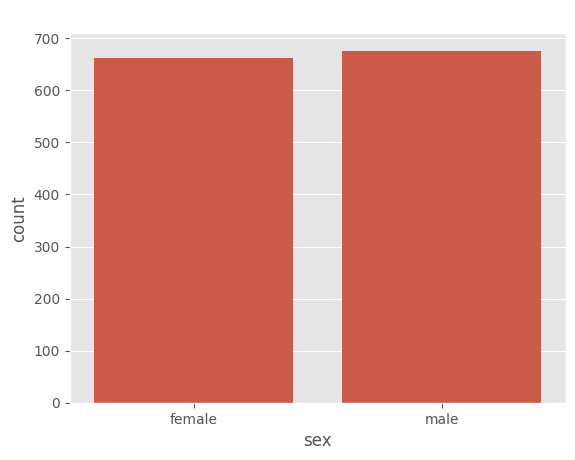

In [12]:
plt.Figure(figsize=(4,4))
style.use('ggplot')
sns.countplot(x='sex', data=df)
plt.title('Gender Distribution')
plt.show()

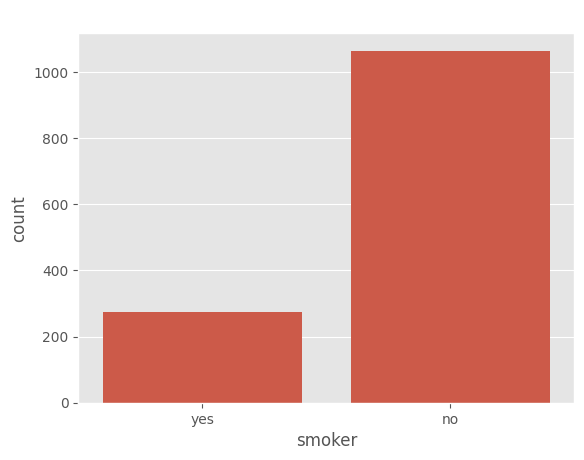

In [13]:
plt.Figure(figsize=(4,4))
sns.countplot(x='smoker',data=df)
plt.title('Smoker')
plt.show()

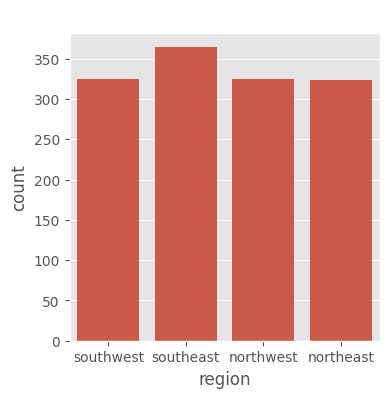

In [14]:
plt.figure(figsize=(4,4))
sns.countplot(x='region',data=df)
plt.title('Region')
plt.show()

Text(0.5, 1.0, 'Cost vs Region')

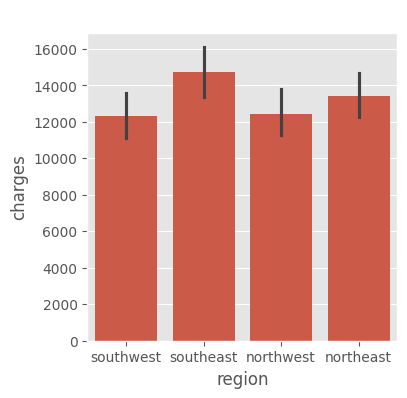

In [15]:
plt.figure(figsize=(4,4))
sns.barplot(x='region',y='charges',data=df)
plt.title('Cost vs Region')

Text(0.5, 1.0, 'Charger for smoker')

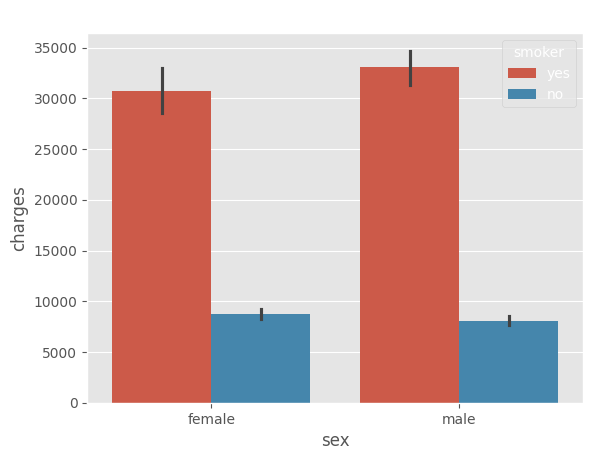

In [16]:
plt.Figure(figsize=(4,4))
sns.barplot(x='sex',y='charges',hue='smoker', data=df)
plt.title('Charger for smoker')

In [17]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [18]:
df['sex'] = df['sex'].apply({'male':0 , 'female':1}.get)
df['smoker']=df['smoker'].apply({'yes':1 , 'no':0}.get)
df['region']=df['region'].apply({'southwest':1 ,'southeast':2 , 'northwest':3 ,'northeast':4}.get)

In [19]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


In [20]:
x=df.drop(['charges','sex'],axis=1)
y=df.charges

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=22)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shpae: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (1070, 5)
X_test shape:  (268, 5)
y_train shpae:  (1070,)
y_test shape:  (268,)


In [22]:
linreg = LinearRegression()


In [23]:
linreg.fit(X_train,y_train)
pred = linreg.predict(X_test)

In [24]:
from sklearn.metrics import r2_score

In [25]:
print("R2 score:",(r2_score(y_test,pred)))

R2 score: 0.7580185688158257


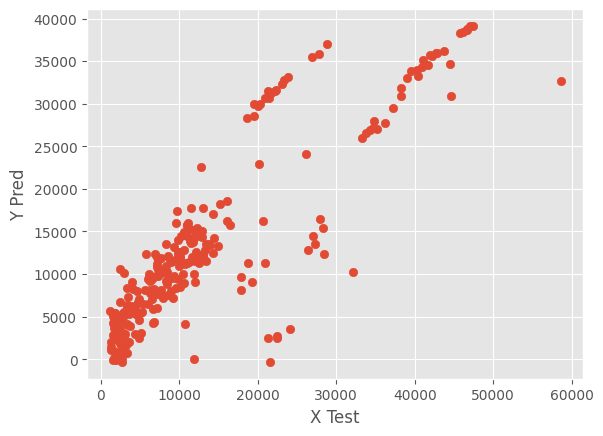

In [26]:
plt.scatter(y_test,pred)
plt.xlabel('X Test')
plt.ylabel('Y Pred')
plt.show()

In [27]:
data ={'age':50,'bmi':25,'children':2,'smoker':1,'region':2}
index = [0]
cust_df = pd.DataFrame(data,index)
cust_df

,age,bmi,children,smoker,region
0,50,25,2,1,2


In [28]:
cost_pred = linreg.predict(cust_df)
print("The medical insurance cost of the new customer is: ", cost_pred)

The medical insurance cost of the new customer is:  [33134.5424366]
